In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler

In [45]:
#loading the dataset
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [46]:
data.shape

(284807, 31)

In [47]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [48]:
scaler=StandardScaler()
data['Amount']=scaler.fit_transform(pd.DataFrame(data['Amount']))

In [49]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [50]:
data=data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [51]:
data.shape

(284807, 30)

In [52]:
data.duplicated().any()

True

In [53]:
data=data.drop_duplicates()

In [54]:
data.shape

(275663, 30)

In [55]:
data['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [56]:
x=data.drop('Class',axis=1)
y=data['Class']

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
                                               random_state=42)

In [58]:
#undersampling
legit=data[data['Class']==0]
fraud=data[data['Class']==1]

In [59]:
legit.shape

(275190, 30)

In [60]:
fraud.shape

(473, 30)

In [61]:
legit_sample=legit.sample(n=473)
legit_sample.shape

(473, 30)

In [62]:
new_data=pd.concat([legit_sample,fraud],ignore_index=True)

In [63]:
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [64]:
new_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.533504,0.226753,1.620729,-2.094361,-0.497869,-0.741219,0.498605,-0.065437,0.792552,-1.592271,...,0.016236,-0.014949,-0.087478,-0.097273,-0.019498,-0.076108,0.077132,0.107274,-0.100750,0
1,-2.832424,2.774467,-2.397368,-1.601980,0.733365,-1.485898,1.185384,0.120572,1.358806,2.391087,...,-0.079892,0.641661,-0.091621,0.629106,0.261711,0.116817,1.334934,0.915646,-0.322364,0
2,1.340815,-0.480526,-0.053936,-0.835921,-0.610226,-0.785511,-0.223373,-0.157670,-1.278193,0.793449,...,-0.155173,-0.714161,0.047984,-0.020553,0.339507,-0.530219,-0.028932,0.006561,-0.161321,0
3,-1.477285,0.591318,1.396755,-1.549721,-0.035484,1.032070,-0.279203,0.838761,0.243455,-1.012891,...,0.047147,-0.174830,-0.451012,-0.347364,0.350994,0.514528,-0.353710,-0.084427,-0.161921,0
4,2.051857,-0.160828,-0.528350,0.266611,-0.197526,-0.288321,-0.357983,-0.139241,1.070432,-0.208792,...,-0.213938,-0.357425,0.265277,-0.713557,-0.267093,-0.582657,0.046846,-0.035780,-0.352750,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
942,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
943,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
944,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [65]:
x=new_data.drop('Class',axis=1)
y=new_data['Class']

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
                                               random_state=42)

LOGISTIC REGRESSION

In [67]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [68]:
y_pred1=log.predict(x_test)

In [69]:
print('Accuracy=',accuracy_score(y_test,y_pred1))
print('Precision=',precision_score(y_test,y_pred1))
print('Recall=',recall_score(y_test,y_pred1))
print('F1 score=',f1_score(y_test,y_pred1))

Accuracy= 0.9368421052631579
Precision= 0.96875
Recall= 0.9117647058823529
F1 score= 0.9393939393939394


DECISION TREE

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [71]:
y_pred2=dt.predict(x_test)

In [72]:
print('Accuracy=',accuracy_score(y_test,y_pred2))
print('Precision=',precision_score(y_test,y_pred2))
print('Recall=',recall_score(y_test,y_pred2))
print('F1 score=',f1_score(y_test,y_pred2))

Accuracy= 0.9105263157894737
Precision= 0.912621359223301
Recall= 0.9215686274509803
F1 score= 0.9170731707317074


Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [74]:
y_pred3=rf.predict(x_test)

In [75]:
print('Accuracy=',accuracy_score(y_test,y_pred3))
print('Precision=',precision_score(y_test,y_pred3))
print('Recall=',recall_score(y_test,y_pred3))
print('F1 score=',f1_score(y_test,y_pred3))

Accuracy= 0.9263157894736842
Precision= 0.9583333333333334
Recall= 0.9019607843137255
F1 score= 0.9292929292929293


In [76]:
import seaborn as sns
final_data=pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest'],
              'Accuracy':[accuracy_score(y_test,y_pred1)*100,
                          accuracy_score(y_test,y_pred2)*100,
                          accuracy_score(y_test,y_pred3)*100],
              })
final_data


,Model,Accuracy
0,Logistic Regression,93.684211
1,Decision Tree,91.052632
2,Random Forest,92.631579


<Axes: xlabel='Model', ylabel='Accuracy'>

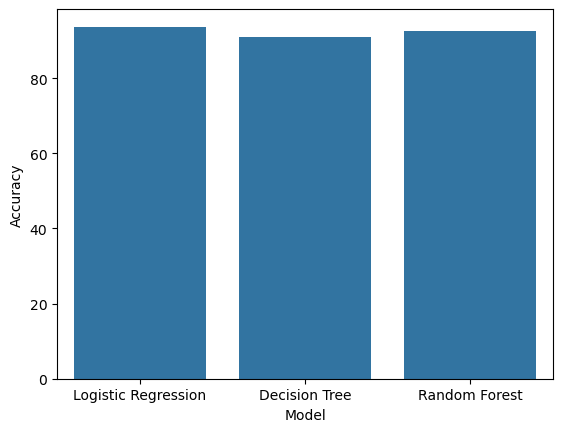

In [77]:
sns.barplot(x='Model', y='Accuracy', data=final_data)

In [78]:
pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest'],
              'Precision':[precision_score(y_test,y_pred1)*100,
                          precision_score(y_test,y_pred2)*100,
                          precision_score(y_test,y_pred3)*100],
              })

,Model,Precision
0,Logistic Regression,96.875000
1,Decision Tree,91.262136
2,Random Forest,95.833333


In [79]:

pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest'],
              'Recall':[recall_score(y_test,y_pred1)*100,
                          recall_score(y_test,y_pred2)*100,
                          recall_score(y_test,y_pred3)*100],
              })


,Model,Recall
0,Logistic Regression,91.176471
1,Decision Tree,92.156863
2,Random Forest,90.196078


In [80]:
pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest'],
              'F1_score':[f1_score(y_test,y_pred1)*100,
                          f1_score(y_test,y_pred2)*100,
                          f1_score(y_test,y_pred3)*100],
              })

,Model,F1_score
0,Logistic Regression,93.939394
1,Decision Tree,91.707317
2,Random Forest,92.929293


**OVERSAMPLING**

In [81]:
#loading the dataset
Data=pd.read_csv('creditcard.csv')
Data.head()
scaler=StandardScaler()
Data['Amount']=scaler.fit_transform(pd.DataFrame(Data['Amount']))
Data=Data.drop(['Time'],axis=1)
Data=Data.drop_duplicates()


In [82]:
x=data.drop('Class',axis=1)
y=data['Class']

In [83]:
x.shape

(275663, 29)

In [84]:
y.shape

(275663,)

In [85]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x,y)

In [86]:
y_smote.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [87]:
X_train,X_test,Y_train,Y_test=train_test_split(x_smote,y_smote,test_size=0.20,
                                               random_state=42)

LOGISTIC REGRESSION

In [88]:
log_over=LogisticRegression()
log_over.fit(X_train,Y_train)

LogisticRegression()

In [89]:
Y_pred1=log_over.predict(X_test)
print('Accuracy=',accuracy_score(Y_test,Y_pred1))
print('Precision=',precision_score(Y_test,Y_pred1))
print('Recall=',recall_score(Y_test,Y_pred1))
print('F1 score=',f1_score(Y_test,Y_pred1))

Accuracy= 0.9456466441367782
Precision= 0.9726732749643229
Recall= 0.9169863461992982
F1 score= 0.9440092834348709


DECISION TREE

In [90]:
from sklearn.tree import DecisionTreeClassifier
DT_over=DecisionTreeClassifier()
DT_over.fit(X_train,Y_train)

DecisionTreeClassifier()

In [91]:
Y_pred2=DT_over.predict(X_test)
print('Accuracy=',accuracy_score(Y_test,Y_pred2))
print('Precision=',precision_score(Y_test,Y_pred2))
print('Recall=',recall_score(Y_test,Y_pred2))
print('F1 score=',f1_score(Y_test,Y_pred2))

Accuracy= 0.9981649042479741
Precision= 0.9973499355635017
Recall= 0.9989818737159791
F1 score= 0.9981652376108123


RANDOM FOREST

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf_over=RandomForestClassifier()
rf_over.fit(X_train,Y_train)

RandomForestClassifier()

In [93]:
Y_pred3=rf_over.predict(X_test)
print('Accuracy=',accuracy_score(Y_test,Y_pred3))
print('Precision=',precision_score(Y_test,Y_pred3))
print('Recall=',recall_score(Y_test,Y_pred3))
print('F1 score=',f1_score(Y_test,Y_pred3))

Accuracy= 0.9999091536756423
Precision= 0.999818224783233
Recall= 1.0
F1 score= 0.9999091041303083


In [94]:
joblib.dump(rf_over, "randome.pkl")

NameError: name 'joblib' is not defined

In [95]:
import seaborn as sns
final_data=pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest'],
              'Accuracy':[accuracy_score(Y_test,Y_pred1)*100,
                          accuracy_score(Y_test,Y_pred2)*100,
                          accuracy_score(Y_test,Y_pred3)*100],
              })
final_data


,Model,Accuracy
0,Logistic Regression,94.564664
1,Decision Tree,99.816490
2,Random Forest,99.990915


ENSEMBLE MODEL

In [96]:
x=data.drop('Class',axis=1)
y=data['Class']

In [97]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to handle class imbalance (OVERSAMPLING)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

print("Class distribution after SMOTE:", Counter(y_resampled))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define base models
log_ensemble = LogisticRegression()
dt_ensemble = DecisionTreeClassifier()
rf_ensemble = RandomForestClassifier()

# Create Voting Classifier (hard voting)
voting_clf = VotingClassifier(estimators=[('lr', log_ensemble), ('dt', dt_ensemble), ('rf', rf_ensemble)], voting='hard')

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Predictions
y_pred = voting_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.4f}")


Class distribution after SMOTE: Counter({0: 275190, 1: 275190})
Ensemble Model Accuracy: 0.9992


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Classification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import joblib

joblib.dump(voting_clf, "fraud_detection_model.pkl")
joblib.dump(scaler, "scaler.pkl")


In [ ]:
y_resampled

In [ ]:
import joblib

# Load the trained model
model = joblib.load("fraud_detection_model.pkl")

# Load the scaler
scaler = joblib.load("scaler.pkl")


In [ ]:
# Select the last row (excluding the target column)
# Select the last row (excluding the target column)
X_last = X_resampled.iloc[550].values.reshape(1, -1)  # Reshape to 2D  # Assuming the last column is the target


In [ ]:
# Make the prediction
prediction = model.predict(X_last)[0]

# Display result
if prediction == 1:
    print("🚨 Fraudulent Transaction Detected!")
else:
    print("✅ Legitimate Transaction")



In [ ]:
X_resampled.head()